## 0. Note

In [1]:
# This is my practice code for Supervised Learning (Regression) using Linear Regression Algorithm
# From data, i would predict the estimated price for each house based on given variables
# This analysis based on my reference and i would be happy if there's any suggestion which could improve my skill and analysis

### 1. Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

### 2. Load Datasets

In [4]:
boston = pd.read_csv('boston_housing.csv')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
# Change 'medv' variable to 'price'
boston.rename({'medv' : 'price'}, axis = 1, inplace = True)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### 3. EDA

In [6]:
# The shape of data
boston.shape

(506, 14)

In [7]:
# Get the idea if there's any missing value and data type for each column
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
# Get the summary of data
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


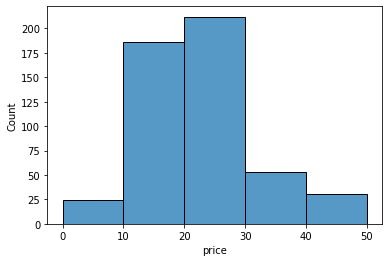

In [9]:
# Plot of price to know the data distribution
sns.histplot(boston['price'], bins = [0,10,20,30,40,50])
plt.show()

### 4. Prepare Data

In [10]:
# split data into train and test
import sklearn
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(boston, test_size = 0.2, random_state = 12)

In [11]:
# train data shape
train_data.shape

(404, 14)

In [12]:
# test data shape
test_data.shape

(102, 14)

In [13]:
# define X_train and y_train
y_train = train_data.iloc[:,13]
X_train = train_data.iloc[:,0:12]

In [14]:
# define X_test and y_test
y_test = test_data.iloc[:,13]
X_test = test_data.iloc[:,0:12]

### 5. Train the Model

In [15]:
# Using Linear Regression
from sklearn.linear_model import LinearRegression

In [16]:
# Define Model
lr_model = LinearRegression()

In [17]:
#Data training model
lr_model.fit(X_train, y_train)

LinearRegression()

### 6. Evaluate the Model

In [18]:
test_accuracy_score = lr_model.score(X_test, y_test)
train_accuracy_score = lr_model.score(X_train, y_train)
print('Train Acuracy : ', train_accuracy_score)
print('Test Acuracy : ', test_accuracy_score)

Train Acuracy :  0.674362959530683
Test Acuracy :  0.7132728684039495


In [19]:
# Import regression metrics to evaluate model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [20]:
# Evaluate Train Data
y_train_predict = lr_model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_predict)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predict))
r2_train = r2_score(y_train, y_train_predict)

print('MSE Score : ', mse_train)
print('RMSE Score : ', rmse_train)
print('R2 Score : ', r2_train)

MSE Score :  27.680885160133755
RMSE Score :  5.261262696362325
R2 Score :  0.674362959530683


In [21]:
# Evaluate Test Data
y_test_predict = lr_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_predict)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)

print('nilai mse test: ', mse_test)
print('nilai rmse test: ', rmse_test)
print('nilai r2 test: ', r2_test)

nilai mse test:  23.428558805408905
nilai rmse test:  4.84030565206464
nilai r2 test:  0.7132728684039495


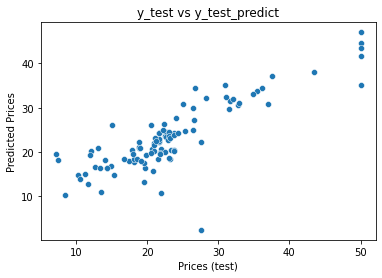

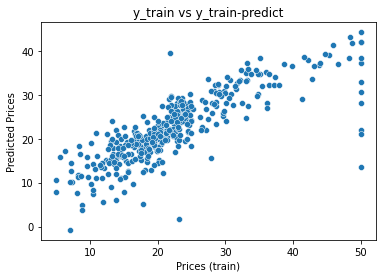

In [22]:
# scatter plot between y_test & y_test_predict
sns.scatterplot(x = y_test, y = y_test_predict)
plt.xlabel('Prices (test)')
plt.ylabel('Predicted Prices')
plt.title('y_test vs y_test_predict')
plt.show()

# scatter plot between y_train & y_train_predict
sns.scatterplot(x = y_train, y = y_train_predict)
plt.xlabel('Prices (train)')
plt.ylabel('Predicted Prices')
plt.title('y_train vs y_train-predict')
plt.show()

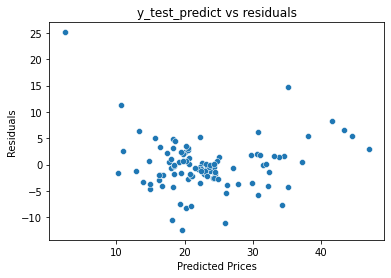

In [23]:
# scatter plot between y_test_predict & residuals
sns.scatterplot(x = y_test_predict, y = y_test - y_test_predict)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('y_test_predict vs residuals')
plt.show()

C:\Users\libra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


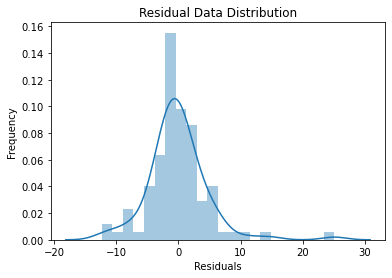

In [24]:
# residual's data distribution
sns.distplot(y_test - y_test_predict)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Data Distribution')
plt.show()